# INTRODUCTION
* Electronic commerce allows thousands of transactions to occur in less than a second, resulting in virtually unlimited opportunities to potentially find and exploit price differences in real time.
It's time to seize the opportunity Jane Street offers to develop their own trading models and machine learning solutions to identify profitable opportunities and quickly decide whether to trade or not! Let's start.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib # _venn as venn
%matplotlib inline

##
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.tools as tls
# from plotly.subplots import make_subplots

# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode, iplot
# from IPython.display import HTML, Image


<a id="3"></a>
# train.csv

In [3]:
train = pd.read_csv("../input/jane-street-market-prediction/train.csv.zip")
train.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [4]:
train.shape, train['resp'].describe()

((2390491, 138),
 count    2.390491e+06
 mean     4.083113e-04
 std      2.693609e-02
 min     -5.493845e-01
 25%     -7.157903e-03
 50%      8.634997e-05
 75%      7.544347e-03
 max      4.484616e-01
 Name: resp, dtype: float64)

<AxesSubplot:>

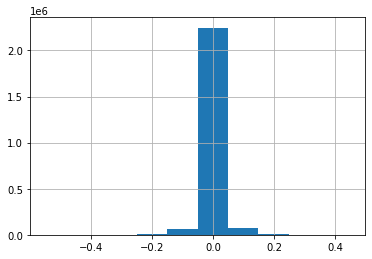

In [5]:
train['resp'].hist()

In [6]:
train['feature_121'].isna().sum()

69854

In [7]:
train['feature_121'].describe()

count    2.320637e+06
mean     2.687757e-01
std      2.174238e+00
min     -7.471971e+00
25%     -1.123252e+00
50%      0.000000e+00
75%      1.342829e+00
max      1.107771e+02
Name: feature_121, dtype: float64

In [8]:
def calc_pdf_cdf(df, col_name): 
    # Get the frequency, PDF and CDF for each value in the series

    # Frequency
    stats_df = df \
    .groupby(col_name) \
    [col_name] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {col_name: 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    return stats_df

<AxesSubplot:xlabel='resp'>

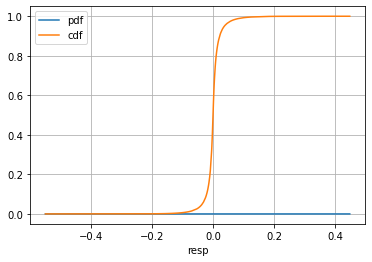

In [9]:
col_name = 'resp' 
stats_df = calc_pdf_cdf(train, col_name)
#stats_df.plot.bar(x = 'resp', y = ['pdf', 'cdf'], grid = True) # for discerete dist. 
stats_df.plot(x = col_name, y = ['pdf', 'cdf'], grid = True) # for continous dist.


In [10]:
stats_df.head(100)

,resp,frequency,pdf,cdf
0,-0.549384,1,4.183241e-07,4.183241e-07
1,-0.483941,1,4.183241e-07,8.366482e-07
2,-0.482720,1,4.183241e-07,1.254972e-06
3,-0.461727,1,4.183241e-07,1.673296e-06
4,-0.456155,1,4.183241e-07,2.091621e-06
...,...,...,...,...
95,-0.317754,1,4.183241e-07,4.015911e-05
96,-0.317590,1,4.183241e-07,4.057744e-05
97,-0.317026,1,4.183241e-07,4.099576e-05
98,-0.316751,1,4.183241e-07,4.141409e-05


In [11]:
df = pd.DataFrame({'A': [10, 1, 2, 2],
...                    'B': [1, 2, 3, 4],
...                    'C': np.random.randn(4)})

In [12]:
df.groupby('A').agg('min')

,B,C
A,,
1,2,-0.129905
2,3,-2.824875
10,1,-0.423000


<AxesSubplot:xlabel='feature_121'>

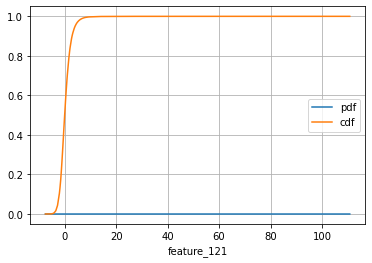

In [13]:
col_name = 'feature_121'
stats_df = calc_pdf_cdf(train, col_name)
#stats_df.plot.bar(x = 'resp', y = ['pdf', 'cdf'], grid = True) # for discerete dist. 
stats_df.plot(x = col_name, y = ['pdf', 'cdf'], grid = True) # for continous dist.

In [14]:
#corr = train[['feature_121', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']].corr()
corr = train[['feature_120', 'feature_119', 'feature_118', 'resp']].corr()

<AxesSubplot:>

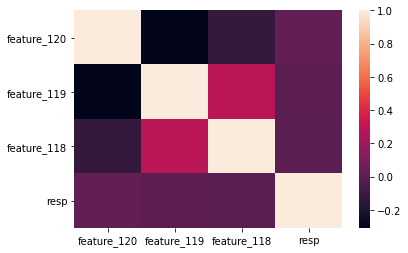

In [15]:
import seaborn as sns
sns.heatmap(corr)

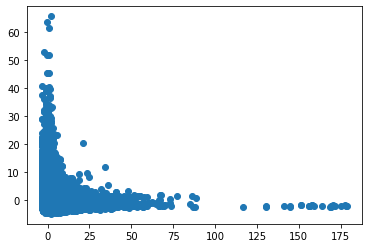

In [16]:
plt.scatter(train['feature_118'], train['feature_120'])

In [72]:
def get_na_stat(df): 
    na_stat = df.isna().sum().to_frame(name='count').rename_axis('feature_name').reset_index(col_fill='fname')
    na_stat = na_stat[na_stat['count']>0]
    return na_stat
na_stat = get_na_stat(train)
na_stat.head(10)

,feature_name,count
10,feature_3,448
11,feature_4,448
14,feature_7,393135
15,feature_8,393135
16,feature_9,788
17,feature_10,788
18,feature_11,80015
19,feature_12,80015
20,feature_13,15353
21,feature_14,15353


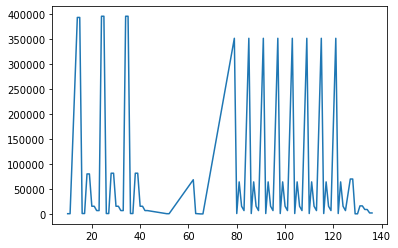

In [40]:
plt.plot(na_stat['count'])

(array([4.000000e+00, 1.000000e+00, 2.700000e+01, 5.250000e+02,
        1.909177e+06, 4.649980e+05, 3.880000e+02, 1.200000e+01,
        0.000000e+00, 6.000000e+00]),
 array([-87.53178705, -69.6929659 , -51.85414474, -34.01532359,
        -16.17650244,   1.66231872,  19.50113987,  37.33996103,
         55.17878218,  73.01760334,  90.85642449]),
 <BarContainer object of 10 artists>)

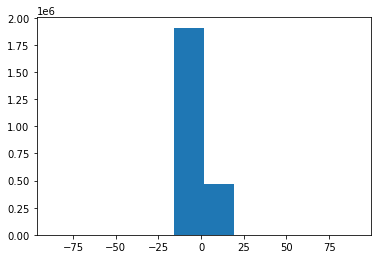

In [18]:
plt.hist(train['feature_13'])

In [165]:
y = train['resp'] #.apply(lambda x : int(x>0))
X = train.drop(['date', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp', 'ts_id'], axis=1, inplace=False)


In [168]:
X.fillna(0, inplace=True)

In [138]:
# cols = X.columns
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer()
# X = pd.DataFrame(imp.fit_transform(X))
# X = pd.DataFrame(X, columns = cols)


In [167]:
len(X.columns)

131

In [140]:
na_stat = get_na_stat(X)
na_stat.head(10)

,feature_name,count
4,feature_3,448
5,feature_4,448
8,feature_7,393135
9,feature_8,393135
10,feature_9,788
11,feature_10,788
12,feature_11,80015
13,feature_12,80015
14,feature_13,15353
15,feature_14,15353


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca_1', 'pca_2'])


In [ ]:
plt.scatter(principalDf['pca_1'], principalDf['pca_2'])

In [ ]:
plt.scatter(principalDf['pca_1'], train['resp'])

In [ ]:
plt.plot(train['resp'])

In [143]:
from sklearn.linear_model import SGDRegressor, SGDClassifier, LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [144]:
y = train['resp']

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [170]:
X_train.shape

(1601628, 131)

In [171]:
from sklearn.pipeline import make_pipeline
clf = LinearRegression()# 

In [172]:
%%time
clf.fit(X_train, y_train)

CPU times: user 2min 20s, sys: 35 s, total: 2min 55s
Wall time: 20.6 s


LinearRegression()

In [173]:
y_pred = clf.predict(X_test)

In [174]:
#accuracy_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.0061941502085202105

In [175]:
y_test.shape, y_pred.shape

((788863,), (788863,))

In [176]:
mean_squared_error(y_test, y_pred)

0.0007159249130253004

In [90]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X, y, cv=5))

[1. 1. 1. 1. 1.]


In [105]:
pd.DataFrame(X_train.apply(sum))

,0
0,4.860257e+06
1,6.581540e+02
2,1.634600e+04
3,6.173544e+05
4,5.717748e+05
...,...
128,5.425947e+05
129,3.696474e+05
130,5.486562e+05
131,3.916465e+05


In [161]:
import pickle

In [189]:
pickle.dump(clf, open('model.pkl', 'wb'))

# some time later...

# load the model from disk
#loaded_model = pickle.load(open('model.pkl', 'rb')) 

In [188]:
pickle.dump(X_test.columns, open('feature_columns.pkl', 'wb'))


In [187]:
X_test.columns

Index(['weight', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_120', 'feature_121', 'feature_122', 'feature_123',
       'feature_124', 'feature_125', 'feature_126', 'feature_127',
       'feature_128', 'feature_129'],
      dtype='object', length=131)

In [177]:
import xgboost as xgb

In [179]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [180]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'reg:squarederror'}
param['nthread'] = 4
param['eval_metric'] = ['rmse']
evallist = [(dtest, 'eval'), (dtrain, 'train')]


In [182]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	eval-rmse:0.02678	train-rmse:0.02691
[1]	eval-rmse:0.02675	train-rmse:0.02688
[2]	eval-rmse:0.02674	train-rmse:0.02686
[3]	eval-rmse:0.02671	train-rmse:0.02684
[4]	eval-rmse:0.02670	train-rmse:0.02682
[5]	eval-rmse:0.02668	train-rmse:0.02680
[6]	eval-rmse:0.02666	train-rmse:0.02678
[7]	eval-rmse:0.02665	train-rmse:0.02677
[8]	eval-rmse:0.02665	train-rmse:0.02676
[9]	eval-rmse:0.02665	train-rmse:0.02676
[10]	eval-rmse:0.02665	train-rmse:0.02675
[11]	eval-rmse:0.02664	train-rmse:0.02675
[12]	eval-rmse:0.02660	train-rmse:0.02671
[13]	eval-rmse:0.02660	train-rmse:0.02670
[14]	eval-rmse:0.02660	train-rmse:0.02670
[15]	eval-rmse:0.02659	train-rmse:0.02669
[16]	eval-rmse:0.02658	train-rmse:0.02668
[17]	eval-rmse:0.02657	train-rmse:0.02667
[18]	eval-rmse:0.02656	train-rmse:0.02666
[19]	eval-rmse:0.02655	train-rmse:0.02665
[20]	eval-rmse:0.02654	train-rmse:0.02664
[21]	eval-rmse:0.02654	train-rmse:0.02664
[22]	eval-rmse:0.02654	train-rmse:0.02664
[23]	eval-rmse:0.02654	train-rmse:0.02663
[2

In [184]:
y_pred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

In [185]:
r2_score(y_test, y_pred)
#mean_squared-

0.0061941502085202105

In [1]:
#xgb.plot_tree(bst, num_trees=2)

In [2]:
#xgb.to_graphviz(bst, num_trees=2)

In [195]:
xgb

<module 'xgboost' from '/opt/conda/lib/python3.8/site-packages/xgboost/__init__.py'>